In [1]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#cargo los datos del modelo de elevación digital
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)

In [4]:
dem

In [7]:
z = dem['elevation']

In [9]:
# array de la elevación
z

array([[483, 487, 491, ..., 446, 431, 444],
       [475, 486, 489, ..., 432, 440, 457],
       [479, 485, 488, ..., 437, 463, 468],
       ...,
       [597, 592, 582, ..., 259, 268, 274],
       [570, 567, 551, ..., 265, 271, 274],
       [545, 543, 532, ..., 268, 270, 272]], dtype=int16)

In [10]:
#el número de filas y de columnas corresponden al shape de la elevación
nrows, ncols = z.shape

In [11]:
#Defino los valores de x, y
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

In [12]:
region = np.s_[5:50, 5:50] #constructor de indices de tuplas
x, y, z = x[region], y[region], z[region]

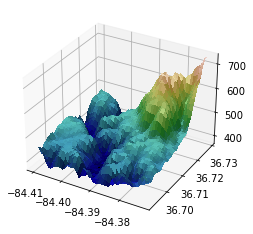

In [19]:
#Genero el sistema de coordendas
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

# Azimut 
# Elevación
ls = LightSource(270, 45)
#ls = LightSource(470, 100)
#customizando la paleta de colores para la superficie
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=False, shade=False)

plt.show()